PANDAS cheat sheet
- Connect to data
- Writing to a file
- Basic exploration
- Filtering and sorting
- Renaming, Adding, Removing columns
- Handling Missing Values
- Split Apply Combine
- Select Multiple columns filter rows
- Joining, Merging Data Frames
- Frequently Used Features
- Less Frequently Used Features

**Connect to data**

Class content may fluxate from using Path method or using the entire string method.
If you are struggling with the path method or connecting to data please reach out throughout the course

review reference and reminder


In [ ]:
#Lets start by importing libraries we need
import os
from pathlib import Path
import pandas as pd

In [ ]:
#Change the current working directory
path = str(Path('C:/Users/Matth/OneDrive/Desktop/DATA'))
os.chdir(project)
os.getcwd()

In [ ]:
drinks = pd.read_csv(path +'/drinks.csv')
drinks

In [ ]:
**Writing to a file**

In [ ]:
# write a DataFrame out to a CSV
drinks.to_csv('drinks_updated.csv') # index is used as first column

In [ ]:
drinks.to_csv('drinks_updated.csv', index=False) # ignore index

In [ ]:
# save a DataFrame to disk (aka 'pickle') and read it from disk (aka 'unpickle')
drinks.to_pickle('drinks_pickle')

In [ ]:
pd.read_pickle('drinks_pickle')

**Basic Exploration**
- Examine the data
- Select a column
- Summarize the data
- Summarize a series
- Exercise
- Bonus

**Examine the data**

In [ ]:
type(drinks)

In [ ]:
drinks.head() # print the first 5 rows

In [ ]:
drinks.head(10) # print the first 10 rows


In [ ]:
drinks.tail() # print the last 5 rows


In [ ]:
drinks.index # "the index" (aka "the labels")


In [ ]:
drinks.columns # column names (which is "an index")


In [ ]:
drinks.dtypes # data types of each column


In [ ]:
drinks.shape # number of rows and columns


In [ ]:
drinks.values # underlying numpy array

**Select a Column**

In [ ]:
drinks['country'] # select one column

In [ ]:
type(drinks['country']) # Series


In [ ]:
drinks.country # select one column using the DataFrame attribute

**Summarize the data**

In [ ]:
drinks.describe() # describe all numeric columns

In [ ]:
drinks.describe(include=['object']) # describe all object columns

In [ ]:
drinks.describe(include='all') # describe all columns

**Summarize a Series**

In [ ]:
# summarize a Series
drinks.country.describe() # describe a single column

In [ ]:
drinks.beer_servings.mean() # only calculate the mean

**Count number of occurences by value**

In [ ]:
drinks.continent.value_counts() # most useful for categorical variables



In [ ]:
drinks.beer_servings.value_counts() # can also be used with numeric variables

In [ ]:
# detecting duplicate rows
drinks.duplicated() # True if a row is identical to a previous row

In [ ]:
drinks.duplicated().sum() # count of duplicates

In [ ]:
drinks[drinks['country'].duplicated()] # only show duplicates

In [ ]:
drinks.drop_duplicates() # drop duplicate rows

In [ ]:
drinks.country.duplicated() # check a single column for duplicates

In [ ]:
drinks.duplicated(['country', 'continent']).sum() # specify columns for finding duplicates

**Filtering and sorting**

In [ ]:
# boolean filtering: only show users with age < 20
low = drinks.beer_servings < 5 # create a Series of booleans...
low

In [ ]:
# you can now use low to filter the data
drinks[low]

In [ ]:
#this can be all done in one step with brackets
drinks[drinks.beer_servings < 5] 

In [ ]:
drinks[drinks.beer_servings < 5].country # select one column from the filtered results

In [ ]:
drinks[drinks.beer_servings < 5].continent.value_counts() # value_counts of resulting Series

In [ ]:
# boolean filtering with multiple conditions
drinks[(drinks.beer_servings < 5) & (drinks.continent=='AS')] # ampersand for AND condition



In [ ]:
drinks[(drinks.beer_servings < 20) | (drinks.beer_servings >=5)] # pipe for OR condition

In [ ]:
# sorting
drinks.beer_servings.sort_values() # sort a column older documentation may use .order()

In [ ]:
drinks.sort_values('beer_servings') # sort a DataFrame by a single column

In [ ]:
drinks.sort_values('beer_servings', ascending=False) # use descending order instead

**Exercise**
- Connect to the Chipolte data and examine
- Create a filter
- Create a sort

**Renaming, Adding, Removing columns**

In [ ]:
# rename one or more columns
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

In [ ]:
# inplace=True this will update the data frame but not return results for viewing
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [ ]:
# replace all column names
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']

In [ ]:
drinks.columns = drink_cols
drinks


In [ ]:
# replace all column names when reading the file
drinks = pd.read_csv('drinks.csv', header=0, names=drink_cols)
drinks


In [ ]:
# add a new column as a function of existing columns
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks

In [ ]:
drinks['mL'] = drinks.liters * 1000
drinks


In [ ]:
# removing columns
drinks.drop('mL', axis=1) # axis=0 for rows, 1 for columns
drinks

In [ ]:
drinks.drop(['mL', 'spirit'], axis=1, inplace=True) # drop multiple columns
drinks

**Handling Missing Values**


In [ ]:
# missing values are usually excluded by default
drinks.continent.value_counts() # excludes missing values

In [ ]:
drinks.continent.value_counts(dropna=False) # includes missing values

In [ ]:
# find missing values in a Series
drinks.continent.isnull() # True if missing

In [ ]:

drinks.continent.notnull() # True if not missing

In [ ]:
# use a boolean Series to filter DataFrame rows
drinks[drinks.continent.isnull()] # only show rows where continent is missing

In [ ]:
drinks[drinks.continent.notnull()] # only show rows where continent is not missing

In [ ]:
# Axis
axis 0 is related to columns 
axis 1 is related to records

In [ ]:
drinks.isnull().sum(axis=0)

In [ ]:
drinks.isnull().sum(axis=1)

In [ ]:
# drop missing values
drinks.dropna() # drop a row if ANY values are missing


In [ ]:
drinks.dropna(how='all') # drop a row only if ALL values are missing

In [ ]:
# fill in missing values
drinks.continent.fillna(value='NA', inplace=True) # fill in missing values with 'NA' or whatever you would like to specify


In [ ]:
# side note: adding booleans some missing values can present in booleans as True or False
pd.Series([True, False, True]) # create a boolean Series


In [ ]:
pd.Series([True, False, True]).sum() # converts False to 0 and True to 1 as it sums

**Exercise**
With Chipolte data
- What % of data is missing overall, what about by column?
- replace column names with easier to type names
- If you plan to remove blanks or nulls (not a bad idea) keep counts before and after

**Aggregates**


In [ ]:
# for each continent, calculate the mean beer servings
drinks.groupby('continent').beer.mean()


In [ ]:
drinks.columns




In [ ]:
# for each continent, count the number of occurrences
drinks.continent.value_counts()



In [ ]:
# for each continent, describe beer servings
drinks.groupby('continent').beer.describe()

In [ ]:
# similar, but outputs a DataFrame and can be customized
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])


In [ ]:
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')



In [ ]:
# if you don't specify a column to which the aggregation function should be applied,
# it will be applied to all numeric columns
drinks.groupby(['continent', 'country']).mean()


In [ ]:
drinks.groupby('continent').describe()

- Select Multiple columns filter row

In [ ]:

# select multiple columns
my_cols = ['beer', 'wine'] # create a list of column names...


In [ ]:
drinks[my_cols] # ...and use that list to select columns


In [ ]:
drinks[['beer', 'wine']] # or, combine into a single step



In [ ]:
# use loc to select columns by name
drinks.loc[:, 'wine'] # colon means "all rows", then select one column


In [ ]:
drinks.loc[:, ['wine', 'beer']] # select two columns


In [ ]:
drinks.loc[:, 'beer':'continent'] # select a range of columns



In [ ]:
# loc can also filter rows by "name" (the index)
drinks.loc[0, :] # row 0, all columns


In [ ]:
drinks.loc[0:2, :] # rows 0/1/2, all columns


In [ ]:
drinks.loc[0:2, 'beer':'continent'] # rows 0/1/2, range of columns



In [ ]:
# use iloc to filter rows and select columns by integer position
drinks.iloc[:, [0, 3]] # all rows, columns in position 0/3


In [ ]:
drinks.iloc[:, 0:4] # all rows, columns in position 0/1/2/3


In [ ]:
drinks.iloc[0:3, :] # rows in position 0/1/2, all columns

**Joining, Merging Data Frames**
Great british bake off!



In [ ]:
bakers = pd.read_csv('C:/Users/Matth/OneDrive/Desktop/DATA/GBBO/bakers.csv')
bakers.head()

In [ ]:
#Change the current working directory
path1 = str(Path('C:/Users/Matth/OneDrive/Desktop/DATA'))
path2 = str(Path('C:/Users/Matth/OneDrive/Desktop/DATA/GBBO'))
project = path1
os.chdir(project)
os.getcwd()

In [ ]:
bakers = pd.read_csv(path1 +'//GBBO//bakers.csv')
bakers.head()

In [ ]:
bakers = pd.read_csv(path2 +'//bakers.csv')
bakers.head()

In [ ]:
seasons = pd.read_csv(path2 + '//seasons.csv')
seasons

In [ ]:
# bakers and season
seasons_bakers = pd.merge(bakers, seasons)
seasons_bakers

What just happened:
- Pandas identified and used column in common,  **series**.  A primary key or unique identifer is the "key" on which the DataFrames will be joined.
 - The first **series** in bakers is 1. Pandas looked through every row in the seasons DataFrame, searching for a series = 1. Every time it found such a row, it recorded the **series**, and **bakers**. It continues this process for every record.  If you observer the results they begin at series 3. looking back at the output of bakers and seasons you should be able to answer why this is happening. 

Four Types of Joins

There are actually four types of joins supported by the Pandas `merge` function. Here's how they are described by the documentation:

- **inner:** use intersection of keys from both frames (SQL: inner join)
- **outer:** use union of keys from both frames (SQL: full outer join)
- **left:** use only keys from left frame (SQL: left outer join)
- **right:** use only keys from right frame (SQL: right outer join)


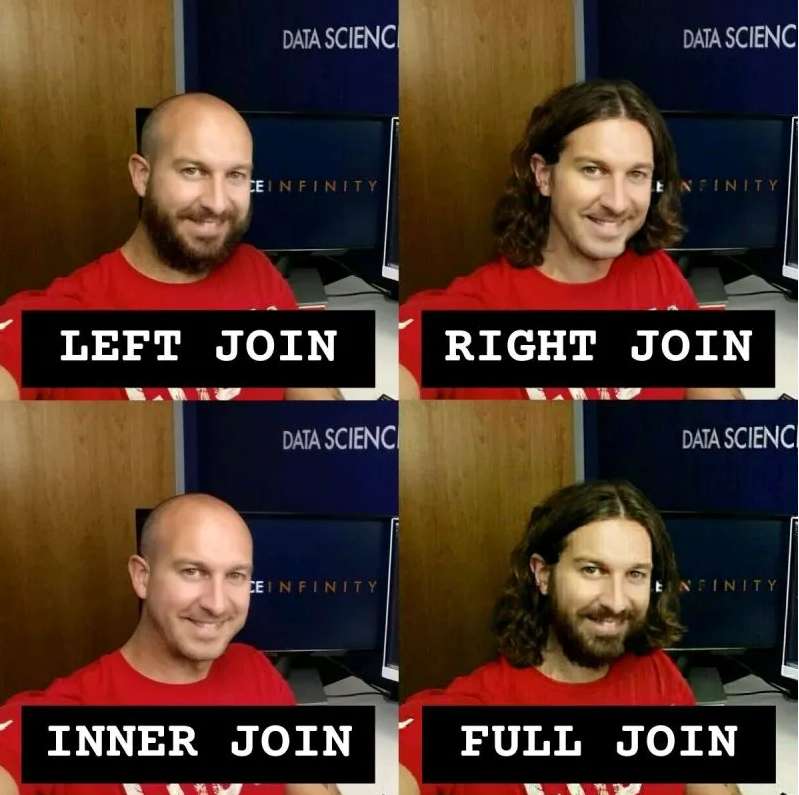

In [ ]:
# ### Inner join
# 
# Only include observations found in both A and B:

pd.merge(bakers, seasons, how = 'inner')

In [ ]:
# ### Outer join
# 
# Include observations found in either A or B:

pd.merge(bakers, seasons,how='outer')

In [ ]:
# ### Left join
# 
# Include all observations found in A:

pd.merge(bakers, seasons, how='left')

In [ ]:
# ### Right join
# 
# Include all observations found in B:
pd.merge(bakers, seasons, how='right')

- Frequently Used Features

In [ ]:
# For these examples let's read in the ufo dataset
ufo = pd.read_csv(path1 +'/ufo.csv')
ufo.head()

In [ ]:
ufo.dtypes

In [ ]:
# change the data type of a column
ufo['City'] = ufo.City.astype('str')
ufo.dtypes

In [ ]:
# change the data type of a column when reading in a file
pd.read_csv('ufo.csv', dtype={'City':object})

In [ ]:
# convert a string to the datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.dtypes

In [ ]:
ufo.Time.dt.hour # datetime format exposes convenient attributes

In [ ]:
(ufo.Time.max() - ufo.Time.min()).days # also allows you to do datetime "math"

In [ ]:
# if we are wanting to filter date and not so much down to the second lets conver this to just a date

#This solution wont really work it only will take a field and format it to datetime, since we are already
#in date time this does not apply but it is good to have this as reference

ufo['Date'] = pd.to_datetime(ufo['Time'], format, '%Y-%m-%d')

In [ ]:
# conver the datetime format to normal date
ufo['date_formatted'] = ufo['Date'].dt.strftime('%Y/%m/%d')
ufo

In [ ]:
ufo[(ufo['date_formatted']>'2013-01-01')]

In [ ]:
ufo[(ufo['date_formatted']>='2013/01/01') & (ufo['date_formatted'] < '2013/06/01')]

In [ ]:
s_date = '2013/01/01'
e_date = '2013/06/01'
ufo[(ufo['date_formatted']>= s_date) & (ufo['date_formatted'] < e_date )]

In [ ]:
s_date = '2013/01/01'
e_date = '2013/06/01'
ufo_filt1 = ufo[(ufo['date_formatted']>= s_date) & (ufo['date_formatted'] < e_date )]
ufo_filt1 

In [ ]:
# replace all instances of a value in a column (must match entire value)
ufo.State.replace('Fl', 'FL', inplace=True)
ufo

In [ ]:
# map existing values to a different set of values
ufo['region'] = ufo.State.map({'NY':'NE'})
ufo

In [ ]:
# determine unique values in a column

In [ ]:
ufo.State.nunique() # count the number of unique values

In [ ]:
ufo.State.unique() # return the unique values

In [ ]:
# string methods are accessed via 'str'
ufo.State.str.upper() # converts to uppercase

In [ ]:
ufo.State.str.contains('NY', na='False') # checks for a substring

In [ ]:
# setting and then removing an index
ufo.set_index('Time', inplace=True)
ufo

In [ ]:
ufo.reset_index(inplace=True)
ufo

In [ ]:
# sort a column by its index
ufo.State.value_counts().sort_index()

- Less Frequently Used Features

In [ ]:
# encode strings as integer values (automatically starts at 0)
ufo['state_num'] = ufo.State.factorize()[0]
ufo

In [ ]:
# map existing values to a different set of values
ufo['region'] = ufo.State.map({'NY':'NE'})
ufo

In [ ]:
# create a DataFrame from a dictionary
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# create a DataFrame from a list of lists
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])


In [ ]:
# display a cross-tabulation of two Series
pd.crosstab(drinks.continent, drinks.country)

In [ ]:
# alternative syntax for boolean filtering (noted as "experimental" in the documentation)
ufo.query('State =="NY"')


In [ ]:
ufo.query('State =="NY"' and 'City =="Ithaca"') # users[(users.age < 20) & (users.gender=='M')]


In [ ]:
# randomly sample a DataFrame
train = drinks.sample(frac=0.75, random_state=1) # will contain 75% of the rows
train

In [ ]:
test = drinks[~drinks.index.isin(train.index)] # will contain the other 25%
test

In [ ]:
# display the memory usage of a DataFrame
ufo.info() # total usage


In [ ]:
ufo.memory_usage() # usage by column

In [ ]:
# change a Series to the 'category' data type (reduces memory usage and increases performance)
ufo['State'] = ufo.State.astype('category')
ufo.memory_usage()

In [ ]:
# temporarily define a new column as a function of existing columns
drinks.assign(servings = drinks.beer_servings + drinks.spirit_servings + drinks.wine_servings)

In [ ]:
# limit which rows are read when reading in a file
pd.read_csv('drinks.csv', nrows=10) # only read first 10 rows

In [ ]:
pd.read_csv('drinks.csv', skiprows=[1, 2]) # skip the first two rows of data